In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
path = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_2/"
file = "amcl_hybrid"
file_2 = "_num_markers"
file_3 = "_num_particles"
file_4 = "_weight_sensor"
file_5 = "_marker_error"
type_file =".txt"
full_path = str(path + file + type_file)
full_path_2 = str(path + file  + file_2 + type_file)
full_path_3 = str(path + file  + file_3 + type_file)
full_path_4 = str(path + file  + file_4 + type_file)
full_path_5 = str(path + file  + file_5 + type_file)
full_path_5

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_2/amcl_hybrid_marker_error.txt'

In [3]:
data = pandas.read_csv(full_path, skipinitialspace = True)
data.head()

,Time,X position error,Y position error,Position error,YAW error,X deviation,Y deviation,YAW deviation,Mean deviation
0,0.411,0.005331,0.026486,0.027018,-0.377088,0.478291,0.468009,0.190090,0.378797
1,3.606,0.016101,0.039987,0.043107,0.221195,0.450470,0.403399,0.122002,0.325290
2,3.805,0.013450,0.006696,0.015024,0.198855,0.451824,0.400544,0.123287,0.325218
3,5.204,0.032402,0.047995,0.057909,-0.214810,0.414969,0.352987,0.091164,0.286373
4,5.403,0.017516,0.009258,0.019812,0.394724,0.416467,0.358568,0.090911,0.288649


In [4]:
data_2 = pandas.read_csv(full_path_2, skipinitialspace = True)
data_2.head()

,Time,Num Markers
0,0.052,1
1,0.311,1
2,0.533,1
3,0.767,1
4,0.971,1


In [5]:
data_3 = pandas.read_csv(full_path_3, skipinitialspace = True)
data_3.head()

,Time,Num Particles
0,0.001,2220
1,0.413,1715
2,3.609,991
3,3.805,785
4,5.204,501


In [6]:
data_4 = pandas.read_csv(full_path_4, skipinitialspace = True)
data_4.head()

,Time,Weight Laser,Weight Marker
0,0.000,0.000000,0.000000
1,0.405,0.000000,2.325665
2,3.604,0.000000,3.445129
3,3.804,1.137991,3.445129
4,5.204,1.137991,4.647682


In [7]:
data_5 = pandas.read_csv(full_path_5, skipinitialspace = True)
data_5.head()

,Time,Marker Error
0,0.408,0.575983
1,3.605,0.367057
2,5.204,0.203592
3,6.803,0.134384
4,8.304,0.106910


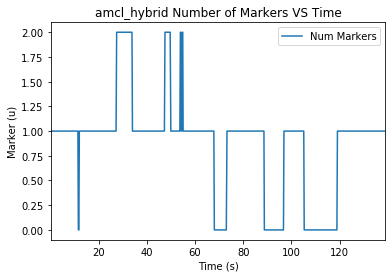

In [8]:
data_2.plot(kind = "line", x = "Time" ,y = {"Num Markers"})
plt.ylabel("Marker (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Markers VS Time")
plt.savefig( file + "_num_markers.png")

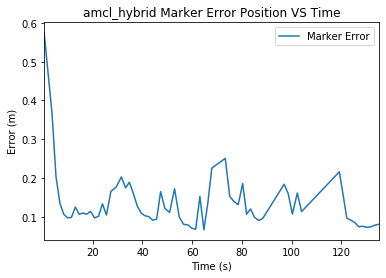

In [9]:
data_5.plot(kind = "line", x = "Time" ,y = {"Marker Error"})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Marker Error Position VS Time")
plt.savefig( file + "_marker_error_position.png")

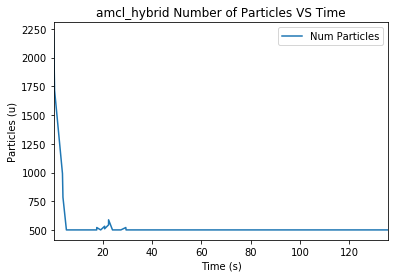

In [10]:
data_3.plot(kind = "line", x = "Time" ,y = {"Num Particles"})
plt.ylabel("Particles (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Particles VS Time")
plt.savefig( file + "_num_particles.png")

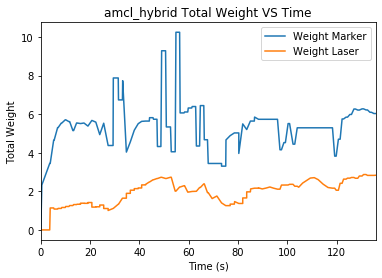

In [11]:
data_4.plot(kind = "line", x = "Time" ,y = {"Weight Laser", "Weight Marker"})
plt.ylabel("Total Weight")
plt.xlabel("Time (s)")
plt.title(file + " Total Weight VS Time")
plt.savefig( file + "_total_weight.png")

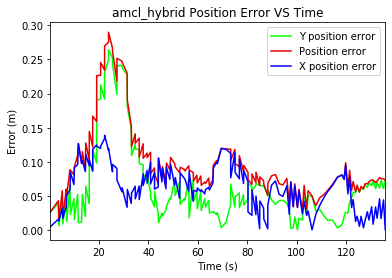

In [12]:
data.plot(kind = "line", x = "Time" ,y = {"X position error", "Y position error", "Position error"}, color = {(0.9,0.0,0.0), (0.0,1.0,0.0), (0.0,0.0,1.0)})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Position Error VS Time")
plt.savefig( file + "_position_error.png")

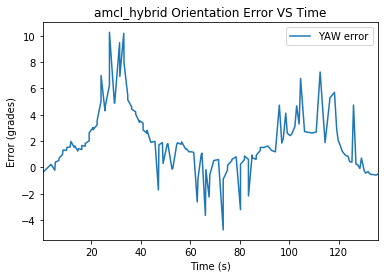

In [13]:
data.plot(kind = "line", x = "Time" ,y = {"YAW error"})
plt.ylabel("Error (grades)")
plt.xlabel("Time (s)")
plt.title(file + " Orientation Error VS Time")
plt.savefig(file + "_orientation_error.png")

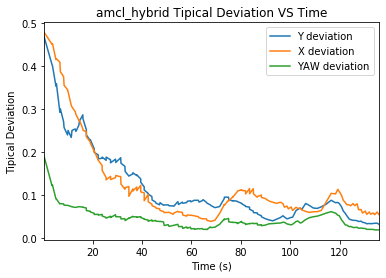

In [14]:
data.plot(kind = "line", x = "Time" ,y = {"X deviation", "Y deviation", "YAW deviation"})
plt.ylabel("Tipical Deviation")
plt.xlabel("Time (s)")
plt.title(file + " Tipical Deviation VS Time")
plt.savefig(file + "_tipical_desviation.png")

In [15]:
mean_x_error = round(data["X position error"].mean(), 3)
mean_y_error = round(data["Y position error"].mean(), 3)
mean_pos_error = round(data["Position error"].mean(), 3)
mean_yaw = round(data["YAW error"].abs().mean(), 3)
mean_x_covariance = round(data["X deviation"].mean(), 3)
mean_y_covariance = round(data["Y deviation"].mean(), 3)
mean_yaw_covariance = round(data["YAW deviation"].mean(), 3)
mean_weight_laser = round(data_4["Weight Laser"].mean(), 3)
mean_weight_marker = round(data_4["Weight Marker"].mean(), 3)
name_file = path + file + "_results.txt"
results = open(name_file, "w")
results.write("Mean laser weight: " + str(mean_weight_laser) + "\n")
results.write("Mean Marker weight: " + str(mean_weight_marker) + "\n")
results.write("Mean X position error: " + str(mean_x_error) + "\n")
results.write("Mean Y position error: " + str(mean_y_error) + "\n")
results.write("Mean Pos position error: " + str(mean_pos_error) + "\n")
results.write("Mean YAW error: " + str(mean_yaw) + "\n")
results.write("Mean X deviation: " + str(mean_x_covariance) + "\n")
results.write("Mean Y deviation: " + str(mean_y_covariance) + "\n")
results.write("Mean YAW deviation: " + str(mean_yaw_covariance) + "\n")
results.close()
name_file = path + file + "_results_comparative.txt"
comparative = open(name_file, "w")
comparative.write("Laser weight,Marker weight,X position error,Y position error,Pos position error,YAW error,X deviation,Y deviation,YAW deviation\n")
comparative.write(str(mean_weight_laser) + ",")
comparative.write(str(mean_weight_marker) + ",")
comparative.write(str(mean_x_error) + ",")
comparative.write(str(mean_y_error) + ",")
comparative.write(str(mean_pos_error) + ",")
comparative.write(str(mean_yaw) + ",")
comparative.write(str(mean_x_covariance) + ",")
comparative.write(str(mean_y_covariance) + ",")
comparative.write(str(mean_yaw_covariance))
comparative.close()